<a href="https://colab.research.google.com/github/dtuleva/Recipe_Recommendation_System/blob/main/paper_1_code_Language_agnostic_BERT_Sentence_Embedding_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 32.3 MB/s eta 0:00:00


In [3]:
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow_text as text  # Needed for loading universal-sentence-encoder-cmlm/multilingual-preprocess
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# Language-agnostic BERT Sentence Embedding

Following code is form kaggle models:

We publicly release our best
multilingual sentence embedding model for
109+ languages at https://tfhub.dev/
google/LaBSE. (tf hub is now kaggle models)

In [4]:
def normalization(embeds):
  norms = np.linalg.norm(embeds, 2, axis=1, keepdims=True)
  return embeds/norms

english_sentences = tf.constant(["dog", "Puppies are nice.", "I enjoy taking long walks along the beach with my dog."])
italian_sentences = tf.constant(["cane", "I cuccioli sono carini.", "Mi piace fare lunghe passeggiate lungo la spiaggia con il mio cane."])
japanese_sentences = tf.constant(["犬", "子犬はいいです", "私は犬と一緒にビーチを散歩するのが好きです"])


preprocessor = hub.KerasLayer(
    "https://kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/cmlm-multilingual-preprocess/versions/2")
encoder = hub.KerasLayer("https://www.kaggle.com/models/google/labse/frameworks/TensorFlow2/variations/labse/versions/2")

english_embeds = encoder(preprocessor(english_sentences))["default"]
japanese_embeds = encoder(preprocessor(japanese_sentences))["default"]
italian_embeds = encoder(preprocessor(italian_sentences))["default"]

# For semantic similarity tasks, apply l2 normalization to embeddings
english_embeds = normalization(english_embeds)
japanese_embeds = normalization(japanese_embeds)
italian_embeds = normalization(italian_embeds)

print (np.matmul(english_embeds, np.transpose(italian_embeds)))

# English-Japanese similarity
print (np.matmul(english_embeds, np.transpose(japanese_embeds)))

# Italian-Japanese similarity
print (np.matmul(italian_embeds, np.transpose(japanese_embeds)))


[[0.63192916 0.30619782 0.44297493]
 [0.11652711 0.8596666  0.35940567]
 [0.14804006 0.32447952 0.9542651 ]]
[[0.935672   0.5403067  0.46792293]
 [0.3180421  0.7622253  0.36085895]
 [0.36750716 0.42791528 0.8171454 ]]
[[0.5343722  0.25018635 0.19974731]
 [0.30140823 0.71333206 0.40647537]
 [0.3850308  0.47767884 0.86743   ]]


Let's try some stuff with it

In [5]:
bulgarian_sentences = tf.constant(["куче", "Кученцата са сладки.", "Аз обичам дълги разходки по плажа с моето куче."])
bulgarian_me_sentences = tf.constant(["котка", "Не обичам кучета", "Който измисля изречения с кучета, а не с котки не е човек."])

In [6]:
bulgarian_embeds = encoder(preprocessor(bulgarian_sentences))["default"]
bulgarian_me_embeds = encoder(preprocessor(bulgarian_me_sentences))["default"]

In [7]:
bulgarian_embeds = normalization(bulgarian_embeds)
bulgarian_me_embeds = normalization(bulgarian_me_embeds)

In [8]:
print (np.matmul(bulgarian_embeds, np.transpose(bulgarian_me_embeds)))

[[0.8836837  0.6050569  0.49100384]
 [0.23057853 0.43266857 0.25179577]
 [0.45354044 0.60121375 0.40188354]]


In [9]:
print (np.matmul(bulgarian_embeds, np.transpose(english_embeds)))

[[0.94893646 0.35552067 0.4584133 ]
 [0.17250879 0.819975   0.23692328]
 [0.42679846 0.37889624 0.9307019 ]]


In [10]:
print (np.matmul(bulgarian_embeds, np.transpose(japanese_embeds)))

[[0.87466383 0.5868841  0.53380346]
 [0.16530952 0.58843255 0.30696496]
 [0.3767397  0.4777222  0.85275865]]


Printing does not make it, let's print a semantic similarity heatmap

<Axes: >

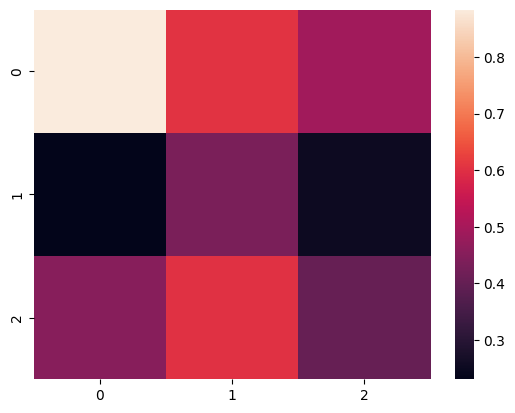

In [11]:
sns.heatmap(np.matmul(bulgarian_embeds, np.transpose(bulgarian_me_embeds)))

<Axes: >

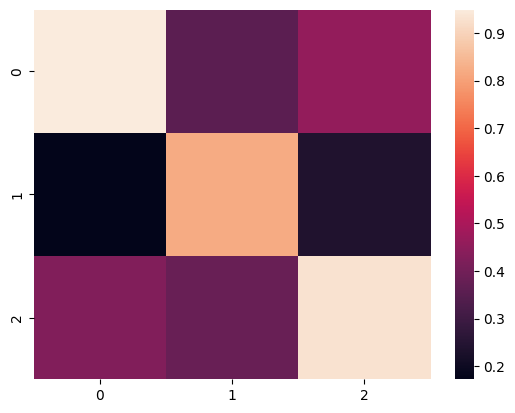

In [12]:
sns.heatmap(np.matmul(bulgarian_embeds, np.transpose(english_embeds)))

<Axes: >

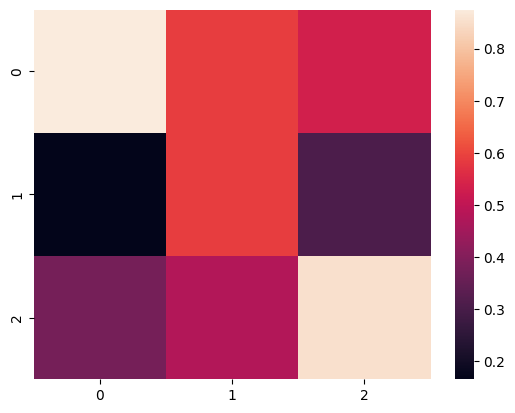

In [13]:
sns.heatmap(np.matmul(bulgarian_embeds, np.transpose(japanese_embeds)))

<Axes: >

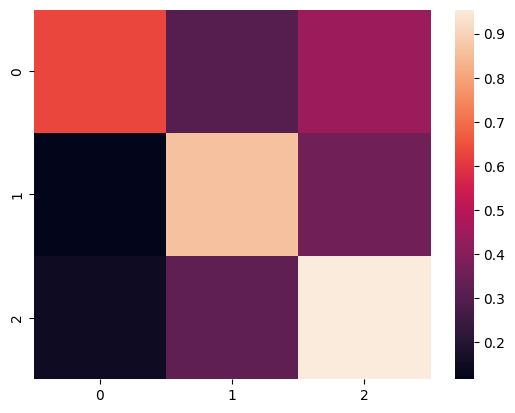

In [14]:
sns.heatmap(np.matmul(english_embeds, np.transpose(italian_embeds)))


<Axes: >

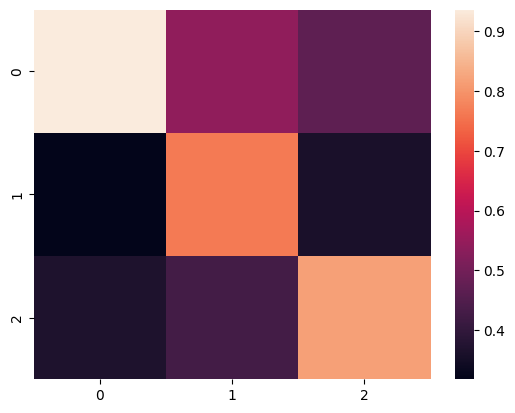

In [15]:

sns.heatmap(np.matmul(english_embeds, np.transpose(japanese_embeds)))



<Axes: >

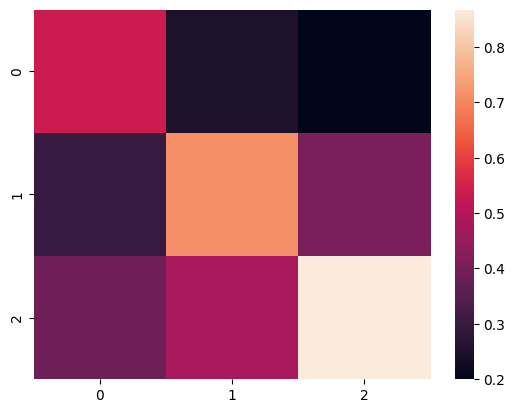

In [16]:
sns.heatmap(np.matmul(italian_embeds, np.transpose(japanese_embeds)))